Data EDA and data cleening

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data from csv file
Mexico_real_estate= pd.read_csv('Maxico-real-estate-clean dataset.csv', encoding= 'unicode_escape')

In [3]:
Mexico_real_estate.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de Mxico,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo Len,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Yucatn,21.052583,-89.538639,205,"$105,191.37"


In [4]:
# data exploration
Mexico_real_estate.shape

(1736, 7)

In [5]:
Mexico_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1736 non-null   int64  
 1   property_type  1736 non-null   object 
 2   state          1736 non-null   object 
 3   lat            1736 non-null   float64
 4   lon            1736 non-null   float64
 5   area_m2        1736 non-null   int64  
 6   price_usd      1736 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 95.1+ KB


In [6]:
# checking the data type for all columns
Mexico_real_estate.dtypes

Unnamed: 0         int64
property_type     object
state             object
lat              float64
lon              float64
area_m2            int64
price_usd         object
dtype: object

price_usd data type is object, that will be very difficult to evaluate. 
To be able to work with this column we need to convert the data type to float 

In [15]:
#Convert the data type in the price section from currency to float
Mexico_real_estate['price_usd']= Mexico_real_estate['price_usd'].replace( '[\$,)]','', regex=True ).astype(float)
Mexico_real_estate.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de Mxico,19.560181,-99.233528,150,67965.56
1,2,house,Nuevo Len,25.688436,-100.198807,186,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,5,house,Yucatn,21.052583,-89.538639,205,105191.37


In [17]:
Mexico_real_estate.describe()

,Unnamed: 0,lat,lon,area_m2,price_usd
count,1736.00000,1736.000000,1736.000000,1736.000000,1736.000000
mean,868.50000,20.765410,-98.798575,170.261521,115331.980766
std,501.28435,2.743425,4.882553,80.594539,65426.173873
min,1.00000,15.752900,-117.054763,60.000000,33157.890000
25%,434.75000,19.275200,-100.392553,101.750000,65789.470000
50%,868.50000,19.620518,-99.204001,156.000000,99262.130000
75%,1302.25000,21.073428,-98.245911,220.000000,150846.665000
max,1736.00000,32.665619,-86.767539,385.000000,326733.660000


In [18]:
# searching for null values
Mexico_real_estate.isnull().sum()

Unnamed: 0       0
property_type    0
state            0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

There is no null value in any of the columns

Checking for duplicate using Unnamed: 0, consider this as an ID

In [19]:
idsUnique = len(set(Mexico_real_estate['Unnamed: 0']))
idsTotal = Mexico_real_estate.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


There is no duplicate

<Axes: xlabel='area_m2', ylabel='Count'>

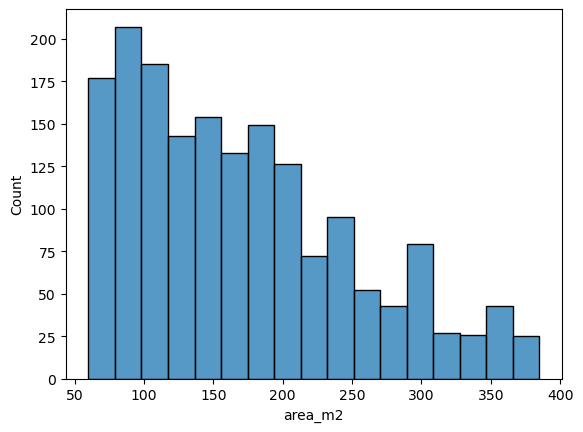

In [20]:
#Exploring the Target Variable(area_m2)
Mexico_real_estate['area_m2'].describe()
sns.histplot(Mexico_real_estate['area_m2'])

Most homes are between 75m^2 and 200m^2, there is no outliers, I will use a different method to confirm that which is boxplot

Text(0.5, 1.0, 'Box Plot of area_m2 (default whiskers)')

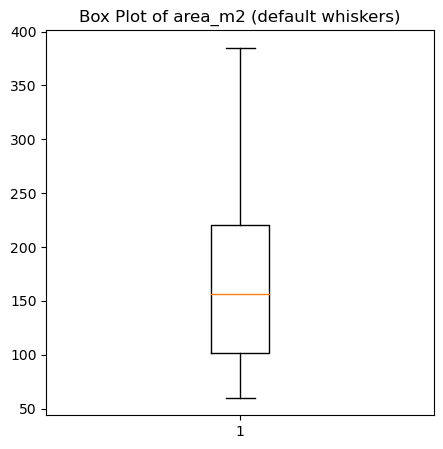

In [21]:
# looking at the area_m2 using boxplots
fig, axes = plt.subplots( figsize=(5, 5))
axes.boxplot(Mexico_real_estate['area_m2'])
axes.set_title('Box Plot of area_m2 (default whiskers)')

It confirmed that there is no outlier in area_m2 column

<Axes: xlabel='price_usd', ylabel='Count'>

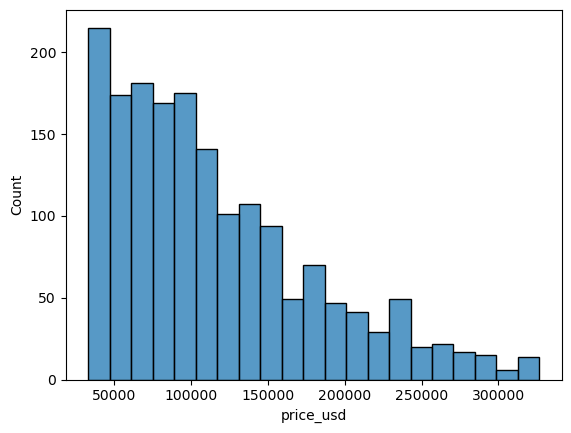

In [22]:
#Exploring second Target Variable which is (price_usd)
sns.histplot(Mexico_real_estate['price_usd'])

It doesnt show any outliers, however using the  boxplot we can see that there are some outlier or out of range, so I adjust teh whisker size to try to include as much data as possible

Text(0.5, 1.0, 'Box Plot of price_usd (defined whisker values)')

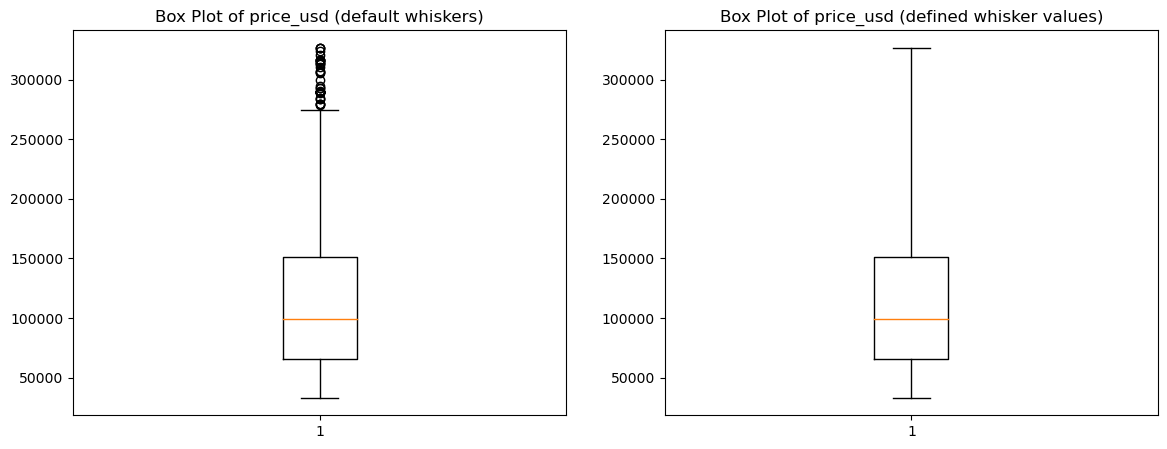

In [23]:
# looking at the price_usd using boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].boxplot(Mexico_real_estate['price_usd'])
axes[0].set_title('Box Plot of price_usd (default whiskers)')

# increase the length of the whisker to account for other data
axes[1].boxplot(Mexico_real_estate['price_usd'], whis=2.25)
axes[1].set_title('Box Plot of price_usd (defined whisker values)')

<Axes: xlabel='price_usd', ylabel='area_m2'>

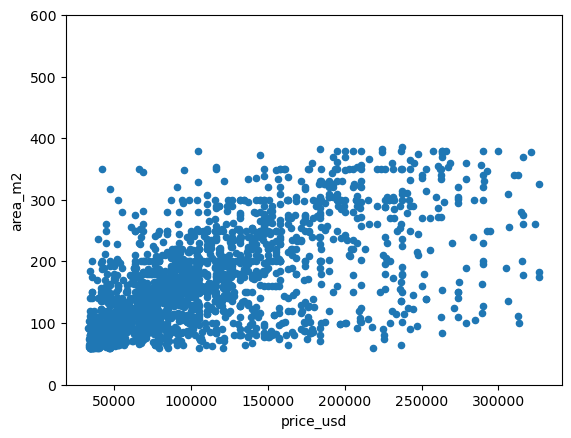

In [24]:
# using scatter plot to explore if there is a relationship between area_m2 and prices
var = 'price_usd'
data = Mexico_real_estate[['area_m2',var]]
data.plot.scatter(x=var, y='area_m2', ylim=(0,600))

We can see some linear relationship between prices and area_m2

In [25]:
#trying to find the number of apartment and houses in the data
Mexico_real_estate.property_type.value_counts()

house        1329
apartment     407
Name: property_type, dtype: int64

In [26]:
Mexico_real_estate.columns

Index(['Unnamed: 0', 'property_type', 'state', 'lat', 'lon', 'area_m2',
       'price_usd'],
      dtype='object')

Categorical Variables:

(array([0, 1]), [Text(0, 0, 'house'), Text(1, 0, 'apartment')])

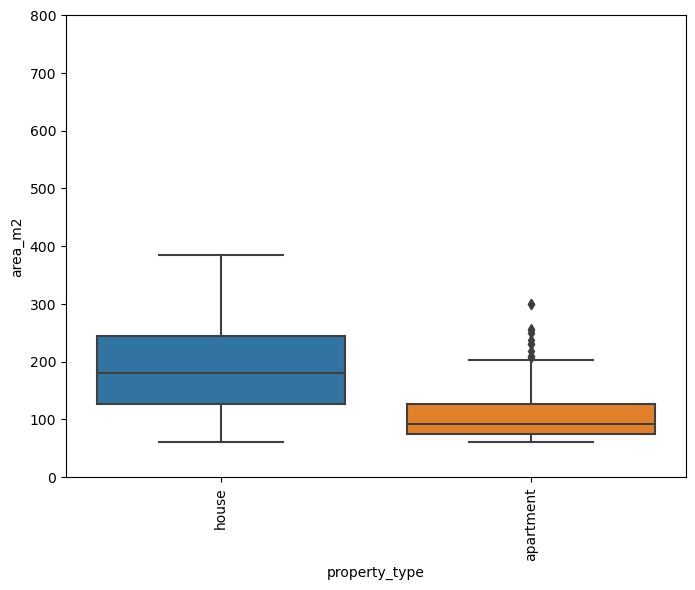

In [27]:
#Categorical Variables using property type and area_m2
var = 'property_type'
data = Mexico_real_estate[['area_m2',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="area_m2", data=data)
fig.axis(ymin=0, ymax=800)
plt.xticks(rotation=90)

The boxplot for the apartment looks have wide range of different sizes.

(array([0, 1]), [Text(0, 0, 'house'), Text(1, 0, 'apartment')])

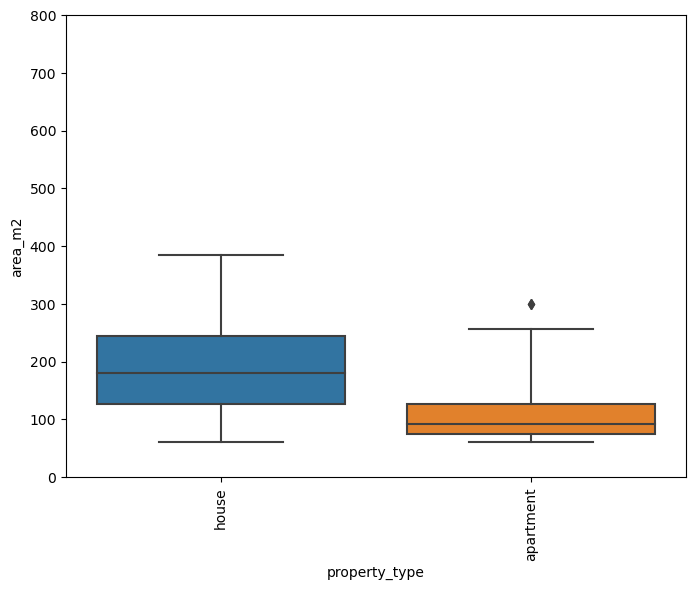

In [28]:
#changing the whisker size - trying to include must of the data
var = 'property_type'
data = Mexico_real_estate[['area_m2',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="area_m2", data=data, whis=2.5)
fig.axis(ymin=0, ymax=800)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'house'), Text(1, 0, 'apartment')])

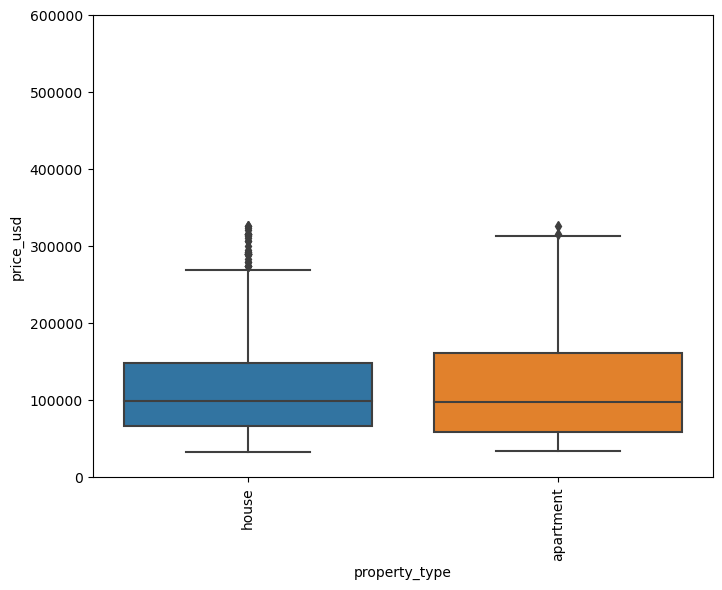

In [29]:
#Categorical Variables using property type and price_usd
var = 'property_type'
data = Mexico_real_estate[['price_usd',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price_usd", data=data)
fig.axis(ymin=0, ymax=600000)
plt.xticks(rotation=90)

With this evaluation the houses have more outliers then the aparmtens

(array([0, 1]), [Text(0, 0, 'house'), Text(1, 0, 'apartment')])

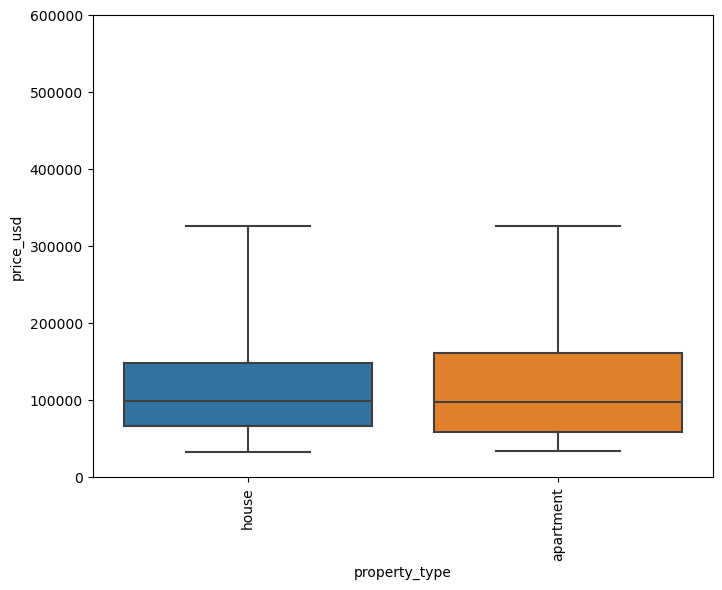

In [30]:
#changing the whisker size - trying to include must of the data
var = 'property_type'
data = Mexico_real_estate[['price_usd',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price_usd", data=data, whis=2.5)
fig.axis(ymin=0, ymax=600000)
plt.xticks(rotation=90)

Categorical Variables using state and price_usd, to show the prices of property in different states

In [31]:
Mexico_real_estate.state.nunique()

30

In [32]:
Mexico_real_estate.state.value_counts()

Distrito Federal                   303
Estado de Mxico                   179
Yucatn                            171
Morelos                            160
Quertaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo Len                          83
Jalisco                             60
San Luis Potos                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala                 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Estado de M\x8exico'),
  Text(1, 0, 'Nuevo Le\x97n'),
  Text(2, 0, 'Guerrero'),
  Text(3, 0, 'Yucat\x87n'),
  Text(4, 0, 'Quer\x8etaro'),
  Text(5, 0, 'Morelos'),
  Text(6, 0, 'Chiapas'),
  Text(7, 0, 'Tabasco'),
  Text(8, 0, 'Distrito Federal'),
  Text(9, 0, 'Nayarit'),
  Text(10, 0, 'Puebla'),
  Text(11, 0, 'Veracruz de Ignacio de la Llave'),
  Text(12, 0, 'Sinaloa'),
  Text(13, 0, 'Tamaulipas'),
  Text(14, 0, 'Jalisco'),
  Text(15, 0, 'San Luis Potos\x92'),
  Text(16, 0, 'Baja California'),
  Text(17, 0, 'Hidalgo'),
  Text(18, 0, 'Quintana Roo'),
  Text(19, 0, 'Sonora'),
  Text(20, 0, 'Chihuahua'),
  Text(21, 0, 'Baja California Sur'),
  Text(22, 0, 'Zacatecas'),
  Text(23, 0, 'Aguascalientes'),
  Text(24, 0, 'Guanajuato'),
  Text(25, 0, 'Durango'),
  Text(26, 0, 'Tlaxcala'),
  Text(27, 0, 'Colima'),
  Text(28, 0, 'Oaxaca'),
  Text(2

C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 151 (\x97) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 135 (\x87) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noora\anaconda3\Lib\site-packages\IPyth

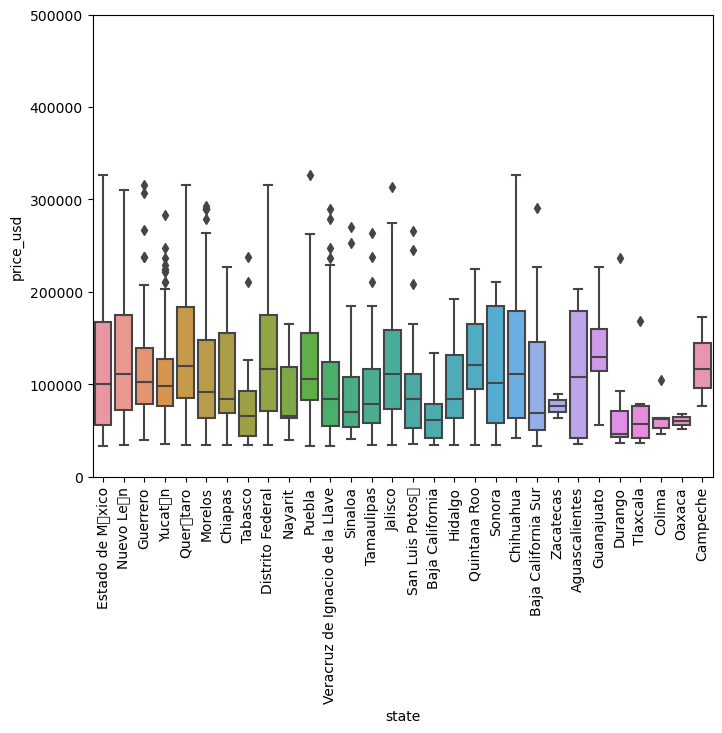

In [33]:
var = 'state'
data = Mexico_real_estate[['price_usd',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price_usd", data=data)
fig.axis(ymin=0, ymax=500000)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Estado de M\x8exico'),
  Text(1, 0, 'Nuevo Le\x97n'),
  Text(2, 0, 'Guerrero'),
  Text(3, 0, 'Yucat\x87n'),
  Text(4, 0, 'Quer\x8etaro'),
  Text(5, 0, 'Morelos'),
  Text(6, 0, 'Chiapas'),
  Text(7, 0, 'Tabasco'),
  Text(8, 0, 'Distrito Federal'),
  Text(9, 0, 'Nayarit'),
  Text(10, 0, 'Puebla'),
  Text(11, 0, 'Veracruz de Ignacio de la Llave'),
  Text(12, 0, 'Sinaloa'),
  Text(13, 0, 'Tamaulipas'),
  Text(14, 0, 'Jalisco'),
  Text(15, 0, 'San Luis Potos\x92'),
  Text(16, 0, 'Baja California'),
  Text(17, 0, 'Hidalgo'),
  Text(18, 0, 'Quintana Roo'),
  Text(19, 0, 'Sonora'),
  Text(20, 0, 'Chihuahua'),
  Text(21, 0, 'Baja California Sur'),
  Text(22, 0, 'Zacatecas'),
  Text(23, 0, 'Aguascalientes'),
  Text(24, 0, 'Guanajuato'),
  Text(25, 0, 'Durango'),
  Text(26, 0, 'Tlaxcala'),
  Text(27, 0, 'Colima'),
  Text(28, 0, 'Oaxaca'),
  Text(2

C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 151 (\x97) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 135 (\x87) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noora\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noora\anaconda3\Lib\site-packages\IPyth

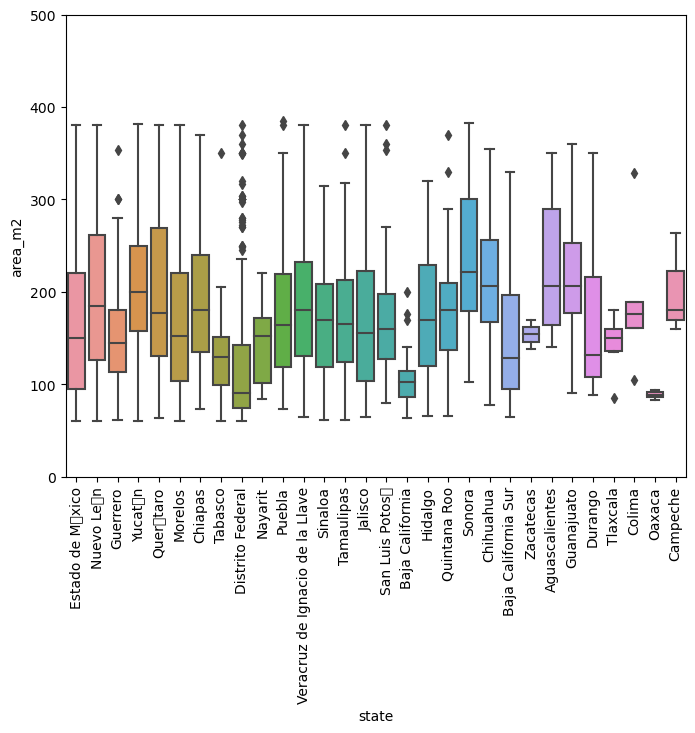

In [34]:
#Categorical Variables using state and area_m2, to show the size of the properties in different state
var = 'state'
data = Mexico_real_estate[['area_m2',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="area_m2", data=data)
fig.axis(ymin=0, ymax=500)
plt.xticks(rotation=90)

In [35]:
# trying to find if there is any correlation between all columns first we need to remove the first columns as it has no value for our data analysis
new_Mexico_estate = Mexico_real_estate.drop(columns ='Unnamed: 0')
new_Mexico_estate.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de Mxico,19.560181,-99.233528,150,67965.56
1,house,Nuevo Len,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatn,21.052583,-89.538639,205,105191.37


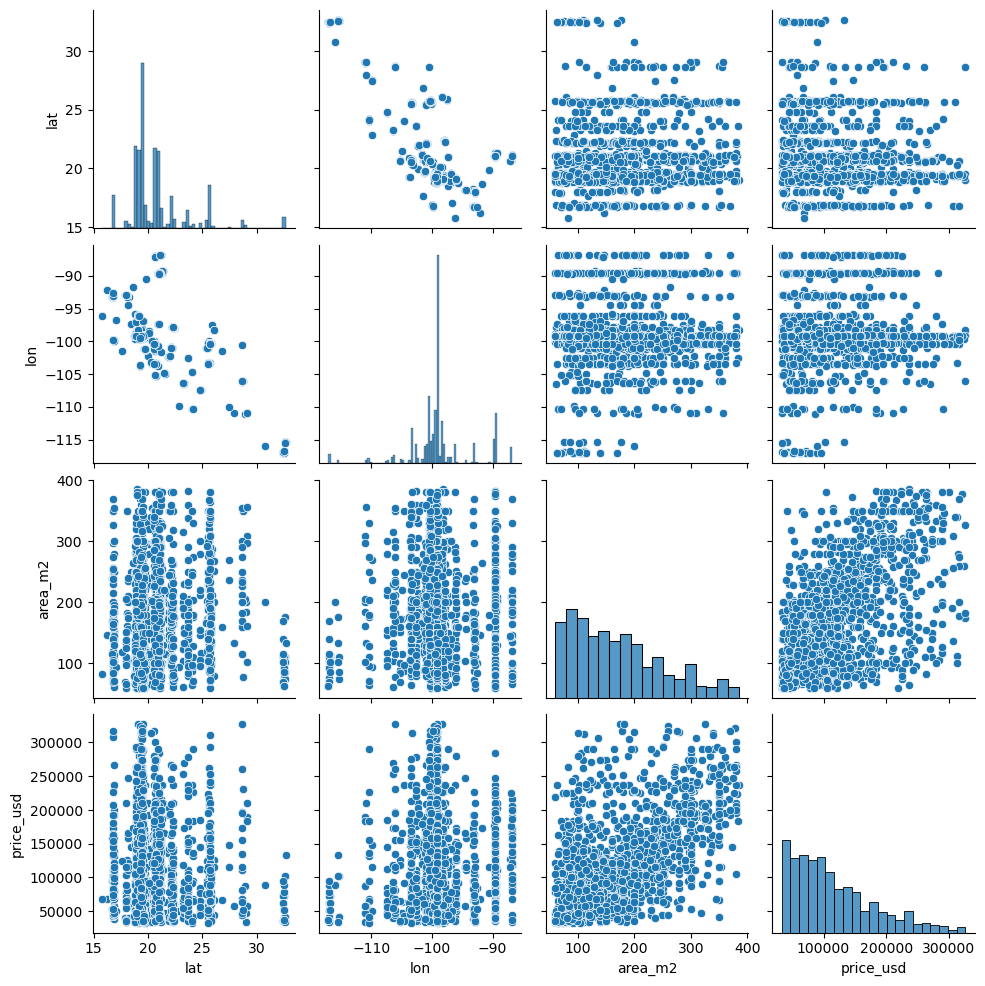

In [36]:
sns.pairplot(data=new_Mexico_estate)
plt.show()

From teh above pariplot we can see that there is correlations between price_usd and area_m2.
For Lat and Lon

In [37]:
Mexico_real_estate.corr()

C:\Users\noora\AppData\Local\Temp\ipykernel_17716\1589061185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mexico_real_estate.corr()


,Unnamed: 0,lat,lon,area_m2,price_usd
Unnamed: 0,1.000000,0.004453,-0.054817,-0.000639,-0.001260
lat,0.004453,1.000000,-0.480231,0.082314,-0.085868
lon,-0.054817,-0.480231,1.000000,0.095522,0.032815
area_m2,-0.000639,0.082314,0.095522,1.000000,0.585518
price_usd,-0.001260,-0.085868,0.032815,0.585518,1.000000
